# 5003 HW2

## ZHANG Juntao - 20908272

### 1. Problem A

Some packages required

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import integrate
from scipy.stats import norm
from scipy.stats import normaltest

#### 1.1 Brownian particle trajectory

Since $U(x)=0$, we can get $\frac{d x}{d t}=\zeta$

Spliting 0.1 second into 10000 time-points, so the value of $\zeta$ at each time instance is to be sampled from variable $Z \sim \mathscr{N}(0,2 / 100000)$ 

Besides, setting $X(0)=0$, we can simulate the particle's trajectory.

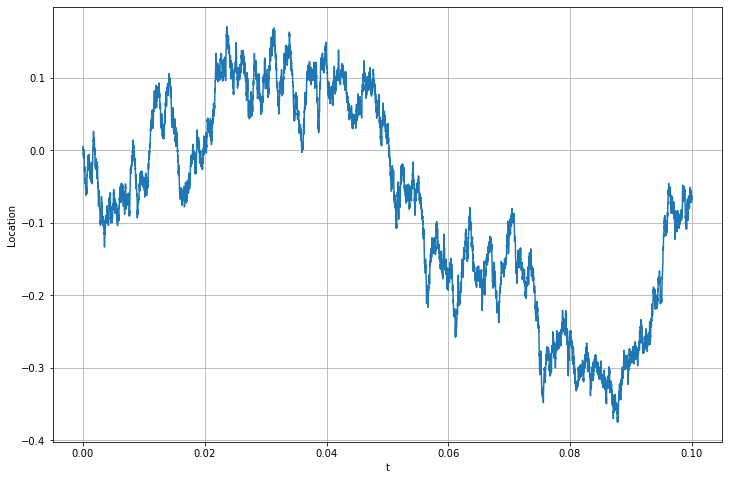

In [95]:
np.random.seed(77)

plt.figure(figsize = (12,8))

def rw(cut):
    points =[]
    points.append(float(0))
    for i in range (1, cut+1):
        step = np.random.normal(0,math.sqrt(2/100000),1)
        next_point = float(points[i-1] + step)
        points.append(next_point)
    return points
cut=10000
for i in range(0,1):
    randomwalk = rw(cut)
    x_ticks = [0.1*k/cut for k in range(cut+1)]
    plt.plot(x_ticks, randomwalk)
    
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Location')
plt.show()

#### 1.2 Compute MSD:$\left\langle[x(t)-x(0)]^2\right\rangle=\left\langle[x(t)]^2\right\rangle$

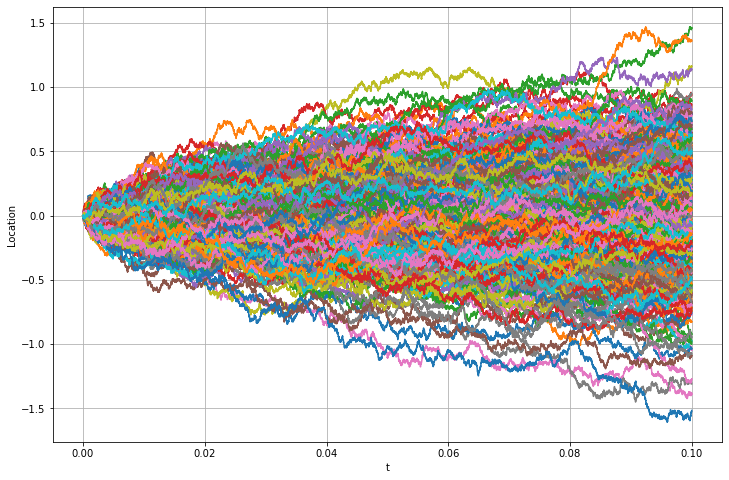

In [96]:
np.random.seed(7)

plt.figure(figsize = (12,8))

cut = 10000
for i in range(0,500):
    walk = rw(cut)
    x_ticks = [0.1*k/cut for k in range(cut+1)]
    plt.plot(x_ticks, walk)
    
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Location')
plt.show()

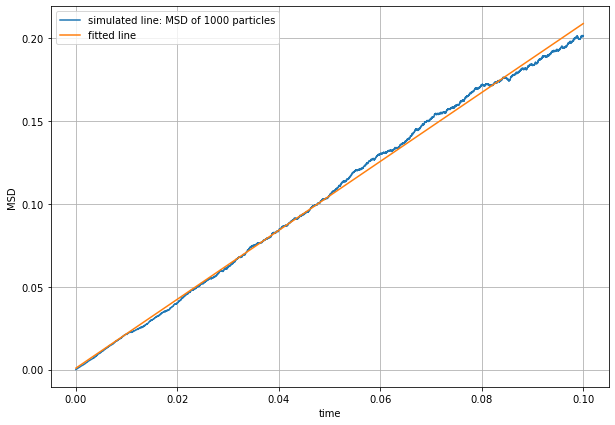

In [97]:
np.random.seed(777)

plt.figure(figsize = (10,7))

n_particle = 1000
cut = 10000
particles = [[] for _ in range(n_particle)]
for i in range(0, n_particle):
    particles[i] = rw(cut)
MSD = []
t = [0.1*i/cut for i in range(1,cut+1)]
for j in range(cut):
    ss = 0
    for k in range(n_particle):
        ss += particles[k][j]**2/n_particle
    MSD.append(ss)

plt.plot(t, MSD, label = 'simulated line: MSD of 1000 particles')

z1 = np.polyfit(t, MSD, 1) 
p1= np.poly1d(z1)
yvals = p1(t)
plot2 = plt.plot(t,yvals,label='fitted line')

plt.xlabel('time')
plt.ylabel('MSD')
plt.legend()
plt.grid(True)     
plt.show()

In [98]:
print(p1)

 
2.079 x + 0.0008206


In [100]:
math.sqrt(np.var(MSD))

0.06008328951036963

We use 1000 particles and divide 0.1 second into 10000 time-points, as we can see from the above figure:

MSD:$\left\langle[x(t)-x(0)]^2\right\rangle=\left\langle[x(t)]^2\right\rangle$ is linear with time, and the slope is close to 2.079, the std of it is 0.06, so the diffusivity obtained from the simulation is 1.0395 with std 0.03

And the theoretical value of diffusivity is $D$ = $k_{b}T / \gamma$, so from the known information in this problem, we can get that it is equal to 1. 

Therefore, the diffusivity obtained from the simulation satisfying the theoretical value.

### 2. Problem B

Since $U(x)=x^{2}/2$, we can get $\frac{d x}{d t}=-x+\zeta$

Setting $X(0)=0$, then deal with $X(t)$ through Euler’s method, we can get that: $x(t+h) \approx x(t)+h f(x, t)=x(t)+h(-x(t)+\zeta)$

So we choose the time interval $h=0.1$, then simulate particle trajectory, to find the stationary PDF from long-time behaviour of particle trajectory.

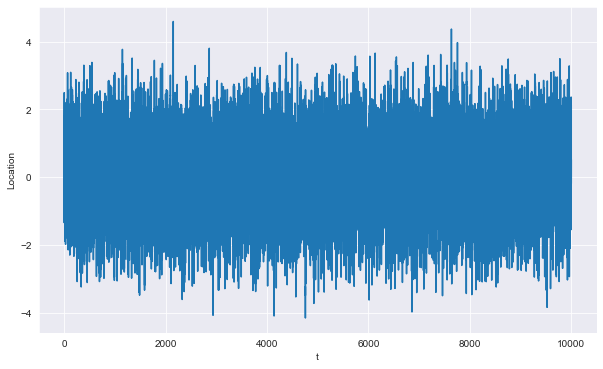

In [147]:
np.random.seed(777)

par = [0]
time = [0]
def particle_tra(t):
    
    for j in range(1,t+1):
        w = np.random.normal(0,math.sqrt(2/0.1),1)
        par.append(float(par[j-1]+0.1*(-1*par[j-1]+w)))
        time.append(j/10)
        
    plt.figure(figsize = (10,6))
    plt.plot(time, par)
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('Location')
    plt.show()

particle_tra(100000)

/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


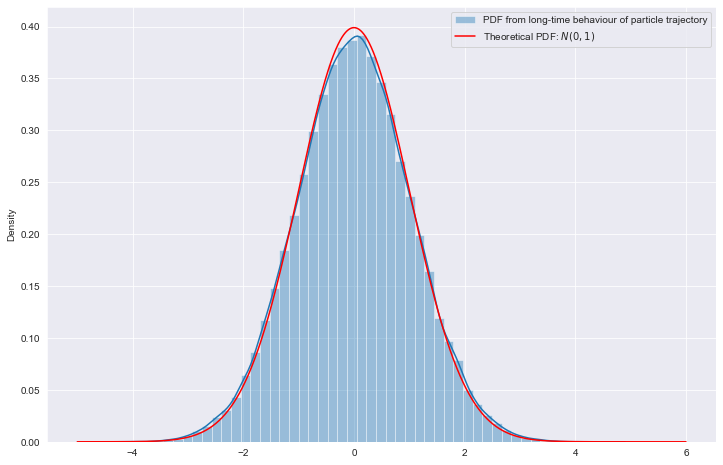

In [148]:
plt.figure(figsize = (12,8))

sns.set_style('darkgrid')
sns.distplot(par, label='PDF from long-time behaviour of particle trajectory')

Z_step = np.arange(-5, 6, 0.001)
Z_theoretical = norm.pdf(Z_step, loc=0, scale=np.sqrt(1))
plt.plot(Z_step,Z_theoretical, color='r', label='Theoretical PDF: $N(0, 1)$')

plt.legend()
plt.show()

#### Normalization test

In [151]:
statistic, p_value = normaltest(par)
print('The value of test statistics is: ',statistic)
print('The p_value is: ',p_value)
if p_value > 0.05:
    print('There is no reason for us to reject null hypothesis,\nwhich means this variable follows a normal distribution.')

The value of test statistics is:  0.30613009936045965
The p_value is:  0.8580739025629261
There is no reason for us to reject null hypothesis,
which means this variable follows a normal distribution.


In [152]:
print('mean:', np.mean(par))
print('variance:', np.var(par))

mean: -0.0028800952842439158
variance: 1.058916757511591


#### Conclusion

As we can we from the above figure and results, the numerical PDF agrees with the theoretical distribution $N(0,1)$. 